<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/CT_Image_Load_Normalization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: CT 이미지를 로드하고, HU 값 범위 제한과 정규화를 적용한 후 시각화하는 작업**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# CT 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/CT/CT 이미지/왼쪽_선암.png'  # 이미지 경로 설정
ct_image = io.imread(image_path, as_gray=True)

In [ ]:
#  원본 이미지 데이터 확인
print(f"Original CT Image - Min Value: {ct_image.min()}, Max Value: {ct_image.max()}")
print(f"Original CT Image - Data Type: {ct_image.dtype}")
print(f"Original CT Image - Shape: {ct_image.shape}")

Original CT Image - Min Value: 0.0, Max Value: 1.0
Original CT Image - Data Type: float64
Original CT Image - Shape: (232, 384)


**정규화 + HU 클리핑 과정** (이미지에 따라 적용 여부 결정)

In [ ]:
# HU 값 클리핑

# CT 이미지에서 HU 값은 -1000 ~ 400 사이의 범위로 제한
# HU -1000 값은 공기의 HU값, 이는 인체 내 빈 공간을 나태낸다.
# HU 400 값으로 연부조직을 설정하면 대부분의 연부 조직과 밀도가 낮은 뼈 구조를
# 충분히 포함 할 수 있다 (연부 조직의 상한선은 400 ~ 1000HU)

# np.clip() 을 활용하여 이미지 배열의 값이 설정된 HU 범위를 초과하지 않도록 설정한다.
# HU 값이 과도하게 차이나는 경우 신뢰도가 떨어지므로,
# 일반적으로 주요 조직이 나타나는 범위로 클리핑 진행

hu_min, hu_max = -1000, 400
clipped_image = np.clip(ct_image, hu_min, hu_max)

# 정규화 작업 진행 => HU 값을 [0,1] 범위로 변환하여 모델 학습에 적합한 형식으로 변환

normalized_image = (clipped_image - hu_min) / (hu_max - hu_min)

# uint8로 변환 (0-255 범위로 스케일 조정)
normalized_image_uint8 = (normalized_image * 255).astype('uint8')

In [ ]:
print(f"Clipped min: {clipped_image.min()}, max: {clipped_image.max()}")
print(f"Normalized min: {normalized_image.min()}, max: {normalized_image.max()}")
print(f"Uint8 min: {normalized_image_uint8.min()}, max: {normalized_image_uint8.max()}")

**해당 이미지의 경우 정규화된 CT 이미지 이므로 바로 uint8 형식으로 변환**

In [ ]:

ct_image_uint8 = (ct_image * 255).astype('uint8')

**원본 이미지와 정규화된 이미지 비교**

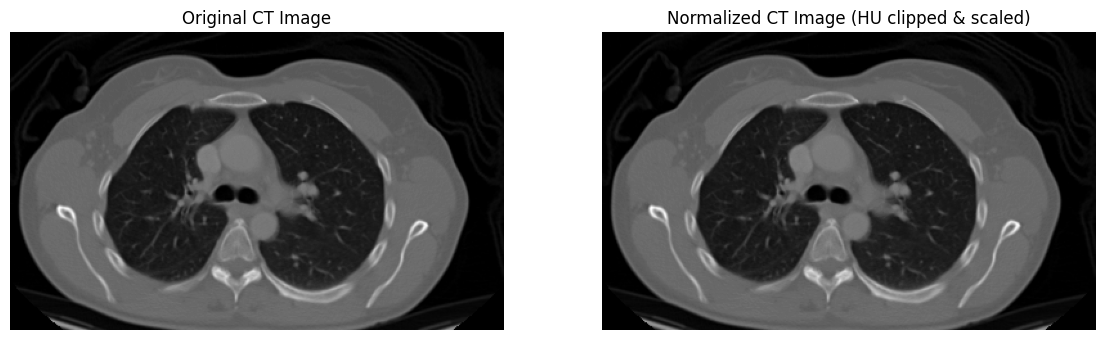

In [ ]:
plt.figure(figsize=(14, 7))

# 원본 CT 이미지
plt.subplot(1, 2, 1)
plt.imshow(ct_image, cmap='gray')
plt.title("Original CT Image")
plt.axis('off')

# 정규화된 CT 이미지
plt.subplot(1, 2, 2)
plt.imshow(ct_image_uint8, cmap='gray')
plt.title("Normalized CT Image (HU clipped & scaled)")
plt.axis('off')

plt.show()